This is basically the same exact code as in `string_MSM_analysis_TICs_deep_time-dev` except it's not a mess like I made it, just the plotting and nothing else

In [7]:
import os
import pickle
import sys
import logging
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plot_parameters_for_paper

logging.getLogger("stringmethod").setLevel(logging.ERROR)
sys.path.append("../../string-method-gmxapi/")
import string_tica_msm as my_msm

['/data2/GLUT5_string/string/analysis/scripts', '/home/semccomas/anaconda3/envs/string_method/lib/python38.zip', '/home/semccomas/anaconda3/envs/string_method/lib/python3.8', '/home/semccomas/anaconda3/envs/string_method/lib/python3.8/lib-dynload', '', '/home/semccomas/anaconda3/envs/string_method/lib/python3.8/site-packages', '../../string-method-gmxapi/', '../../string-method-gmxapi/stringmethod/simulations/../../']


Fructose

In [103]:
name_sim = "influx_BFRU_gate_CV"
path_report = f"/data2/GLUT5_string/string/analysis/images_figs/MSM_FES/IC_EC_MSM/{name_sim}"
path_to_sim = f"/data2/GLUT5_string/string/string_sims/TMD_initial_path/{name_sim}"

#os.chdir(simulation_directory)
#os.getcwd()


In [9]:
cv_labels = ["Intracellular gate distance (nm)", "Extracellular gate distance (nm)"]

xlim = (0.9,1.65)
ylim = (0.75,1.65)

In [10]:
def get_G5_atomistic_gate(timestep):
    # get all pieces together, then colors and naming consistent in plots
    G5_Out = np.array(['OUT', 'Out Open', 'green', "Greens"])
    G5_OutOcc = np.array(['OUT-OCC', 'Out Occ.', 'grey', "Greys"])
    G5_Occ = np.array(['OCC', 'Occluded', 'red', "Reds"])
    G5_InOcc = np.array(['IN-OCC', 'In Occ.', 'orange', "Oranges"])
    G5_In = np.array(['IN', 'In Open', 'blue', "Blues"])
    #all_sims = np.array([G5_Out, G5_OutOcc, G5_Occ, G5_InOcc, G5_In])
    all_sims = np.array([G5_Out, G5_Occ, G5_In])
    indir = '/data2/GLUT5_string/string/analysis/textfiles_out/EC_IC_gate_refs'

 
    out_arr = []
    for n, sim in enumerate(all_sims):
        name = sim[0]
        ec = np.loadtxt(f"{indir}/{name}.EC.{timestep}.xvg")[1]
        ic = np.loadtxt(f"{indir}/{name}.IC.{timestep}.xvg")[1]
        
        
        temp = np.append(all_sims[n], [f'EC: {str(ec)}', f'IC: {str(ic)}'])
        out_arr.append(temp)

    out_arr = np.array(out_arr)
    return out_arr

In [11]:
plot_atomistic = True
name = 'start_model'
#name = 'end_atom'
atom_sims = get_G5_atomistic_gate(name)

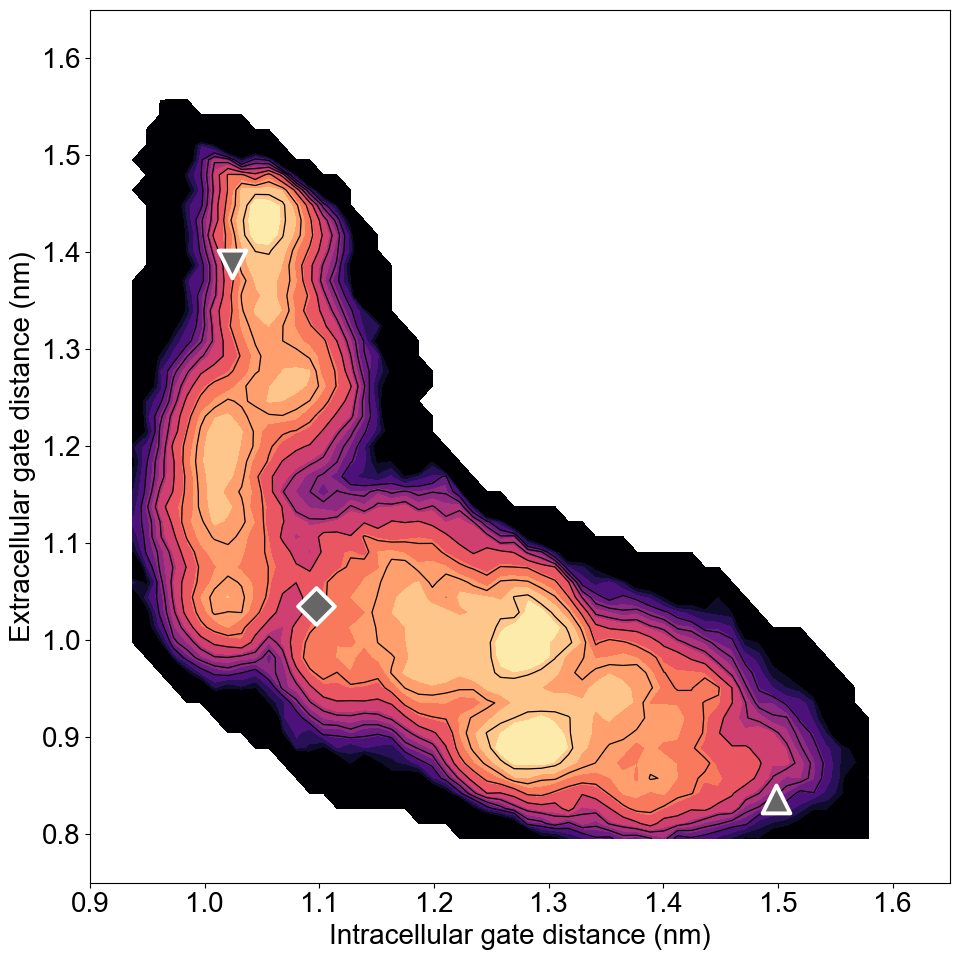

In [12]:
F = np.load(f'{path_to_sim}/F_MSM.npy')
extent = np.load(f'{path_to_sim}/extent_MSM.npy')
cv_proj = np.load(f'{path_to_sim}/cv_proj_MSM.npy')
last_iteration = None
first_iteration = 100

plot_parameters_for_paper.plotting_params()

f_max = 10
#cm = plt.cm.get_cmap('gist_yarg')
cm = plt.cm.get_cmap('magma_r')

if last_iteration == None:
    last_iteration_n = "final"
else:
    last_iteration_n = last_iteration

if 'apo' in name_sim:
    colorbar=False
    ylabel=cv_labels[1]
elif 'BFRU' in name_sim:
    colorbar=False
    ylabel=cv_labels[1]#None
    
with plt.rc_context({"axes.grid": False}):

    fig, ax = my_msm.plot_2D_heatmap(
        F,
        extent,
        cmap=cm,
        f_max=f_max,
        cbar_label="Free Energy (kT)",
        xlabel=cv_labels[0],
        ylabel=ylabel,
        xlim= xlim,
        ylim= ylim,
        colorbar=colorbar
    )

    fig.tight_layout()
    #fig.set_size_inches(10, 10)
    fig.patch.set_facecolor('white')

    plt.rcParams["axes.grid"] = False

    ax.contour(F, vmin=0, vmax=f_max, extent=extent, colors = 'black', \
               levels = [0,1,2,3,4,5,6,7], linewidths=0.9)

    #ax.xaxis.label.set_size(15)
    #ax.yaxis.label.set_size(15)

    markers = ['v','D','^']
    sizes = [400, 350, 400]
    if plot_atomistic:
        for n, sim in enumerate(atom_sims):
            ic = float(sim[-1].split(' ')[1])
            ec = float(sim[-2].split(' ')[1])
            ax.scatter(ic, ec, color = ['#666666'], edgecolor = 'white', \
                       s = sizes[n], zorder=2, marker = markers[n], linewidth = 2.8)

       # fig.savefig(path_report + f"/structure_snapshots/FES_cutoff{f_max}.{name}.iteration{first_iteration}-{last_iteration_n}.svg", \
       #            dpi = 1000)
#



# then the colorbar

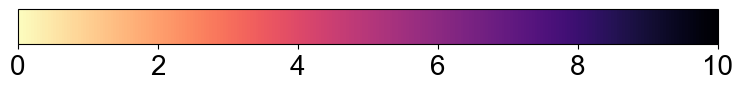

In [20]:
vmin = 0
vmax = 10
plot_parameters_for_paper.plotting_params()

a = np.array([[vmin, vmax]])
plt.figure(figsize=(1, 7))
img = plt.imshow(a, cmap="magma_r")
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.1, 7, 0.05]) #size of colorbar. [?, ?, length, thickness]
plt.colorbar(orientation='horizontal', cax=cax,)

plt.show()
#plt.savefig('../images_figs/MSM_FES/IC_EC_MSM/colorbar_for_influx_max_10.svg',bbox_inches='tight')

# Here is where I will show the abstraction of the FES - for the paper

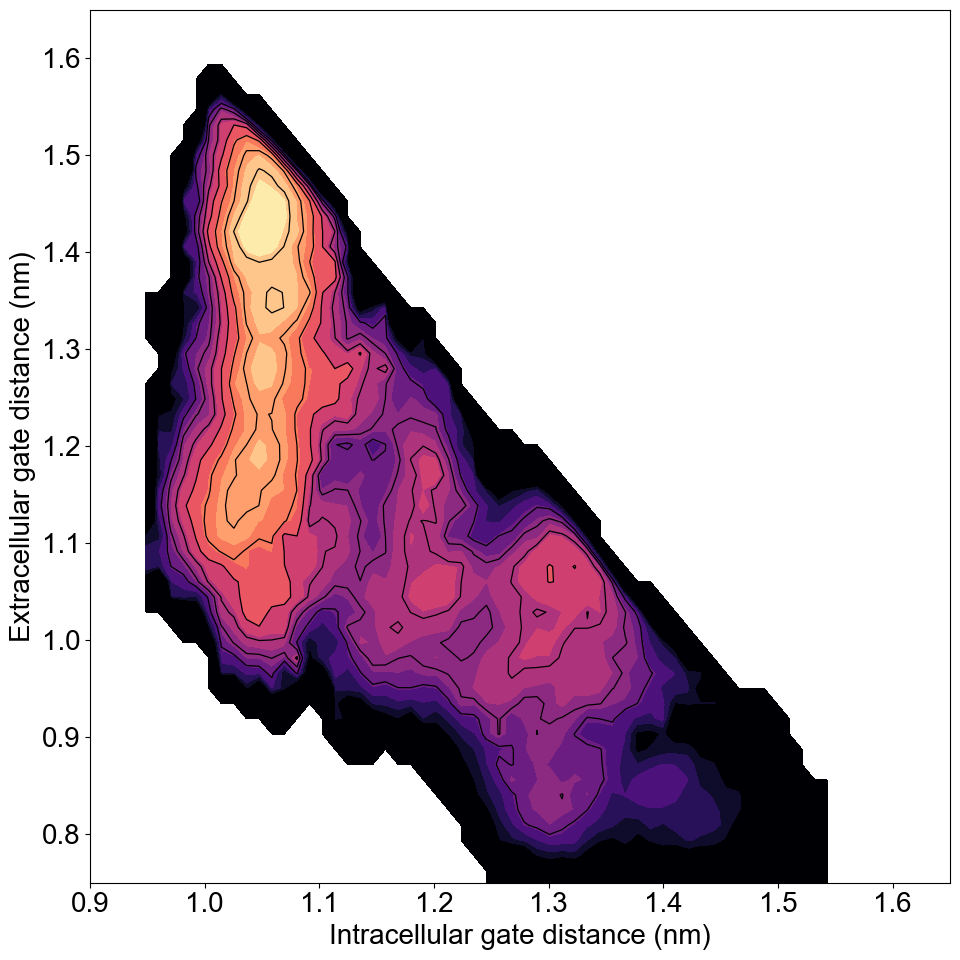

In [68]:
F = np.load(f'{path_to_sim}/F_MSM.npy')
extent = np.load(f'{path_to_sim}/extent_MSM.npy')
cv_proj = np.load(f'{path_to_sim}/cv_proj_MSM.npy')
last_iteration = None
first_iteration = 100

plot_parameters_for_paper.plotting_params()


colorbar=False
ylabel=cv_labels[1]

f_max = 10
#cm = plt.cm.get_cmap('gist_yarg')
cm = plt.cm.get_cmap('magma_r')


with plt.rc_context({"axes.grid": False}):

    fig, ax = my_msm.plot_2D_heatmap(
        F,
        extent,
        cmap=cm,
        f_max=f_max,
        cbar_label="Free Energy (kT)",
        xlabel=cv_labels[0],
        ylabel=ylabel,
        xlim= xlim,
        ylim= ylim,
        colorbar=colorbar
    )

    fig.tight_layout()
    plt.rcParams["axes.grid"] = False
    fig.set_size_inches(10, 10)
    ax.contour(F, vmin=0, vmax=f_max, extent=extent, colors = 'black', \
               levels = [0,1,2,3,4,5,6,7], linewidths=0.9)


    #plt.savefig(f'{path_report}/basic_FES_for_supp.start.svg', dpi = 800)
    plt.show()

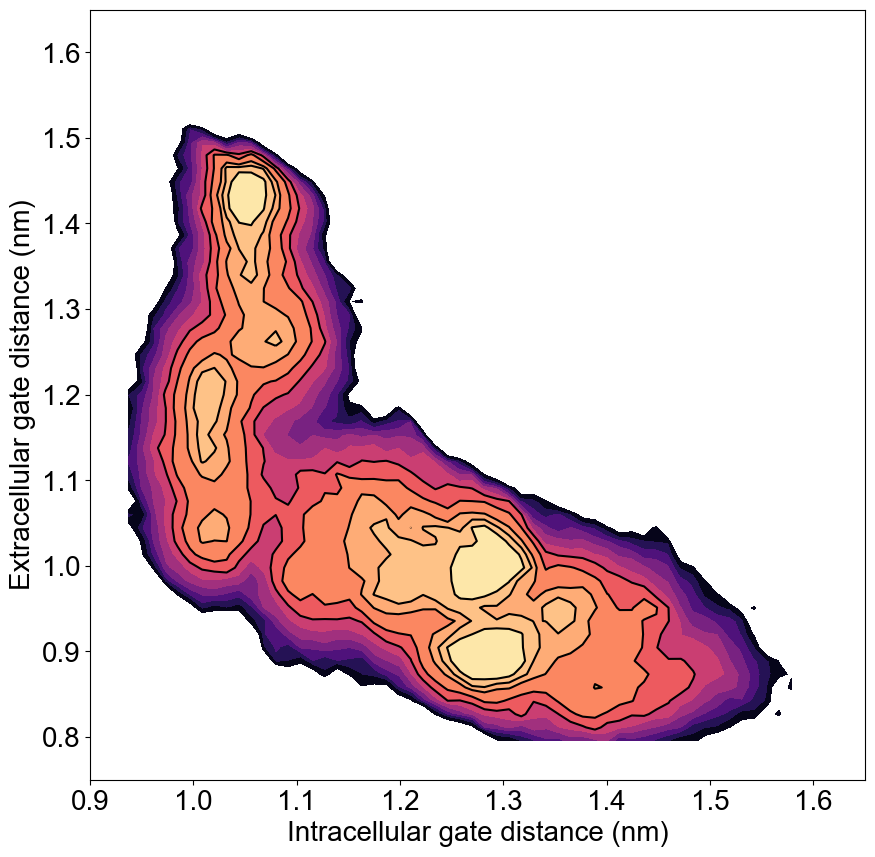

In [23]:
plot_parameters_for_paper.plotting_params()

f, ax = plt.subplots(1,1,figsize=(10,10))
if 'BFRU' in path_report:
    line_levels1 = [0, 1, 1.5, 2, 3, 4,5,6,7,8,9,10]
    line_levels2 = [0, 1, 1.5, 2, 3, 4]
elif 'apo' in path_report:
    line_levels1 = [0, 1,3,5,6,7,8,9,10]
    line_levels2 = [0,1,3,5,7]

ax.contourf(F, extent=extent, cmap = plt.cm.magma_r, levels=line_levels1, vmin=0, vmax=10)
ax.contour(F, extent = extent, levels = line_levels2, vmax = 5, vmin = 0, colors = 'black',)

ax.set_xlabel(cv_labels[0])
ax.set_ylabel(cv_labels[1])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.show()
#plt.savefig(f'{path_report}/basic_FES_for_supp.middle.svg', dpi = 800)

In [24]:
plot_parameters_for_paper.plotting_params()

f, ax = plt.subplots(1,1,figsize=(10,10))



ax.contour(F, extent = extent, levels = line_levels2, vmax = 5, vmin = 0, colors = 'black',)

ax.set_xlabel(cv_labels[0])
ax.set_ylabel(cv_labels[1])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.savefig(f'{path_report}/basic_FES_for_supp.end.svg', dpi = 800)

# for histo method

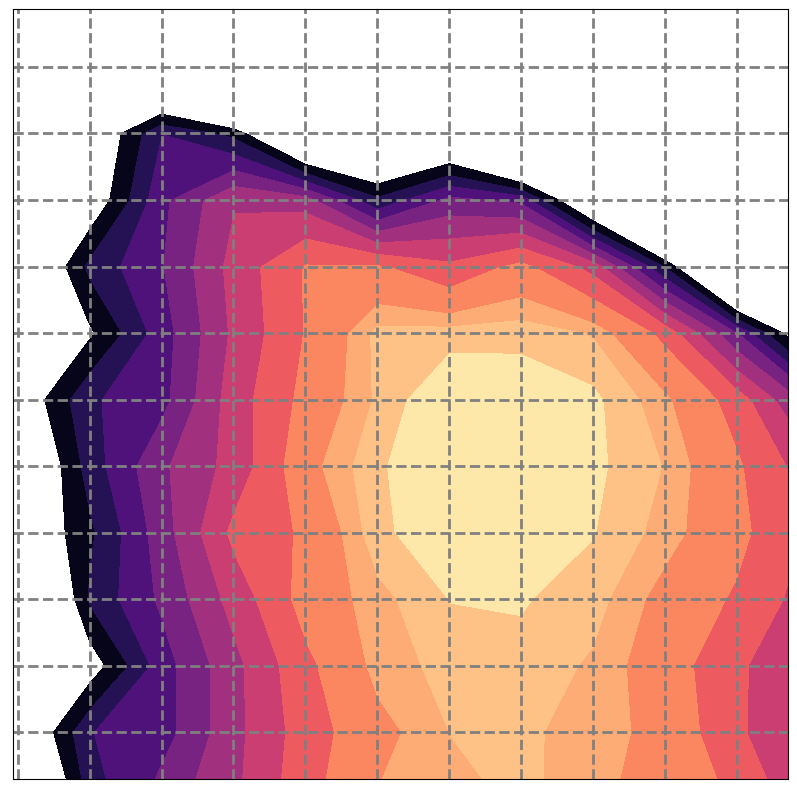

In [26]:
%matplotlib inline 
zoom  = True
F = np.load(f'{path_to_sim}/F_MSM.npy')
extent = np.load(f'{path_to_sim}/extent_MSM.npy')
cv_proj = np.load(f'{path_to_sim}/cv_proj_MSM.npy')
plot_parameters_for_paper.plotting_params()


f, ax = plt.subplots(1,1,figsize=(10,10))
if 'BFRU' in path_report:
    line_levels1 = [0, 1, 1.5, 2, 3, 4,5,6,7,8,9,10]
    line_levels2 = [0, 1, 1.5, 2, 3, 4]
elif 'apo' in path_report:
    line_levels1 = [0, 1,3,5,6,7,8,9,10]
    line_levels2 = [0,1,3,5,7]

ax.contourf(F, extent=extent, cmap = plt.cm.magma_r, levels=line_levels1, vmin=0, vmax=10)

xticks = np.linspace(extent[0], extent[1], 55)
yticks = np.linspace(extent[2], extent[3], 55)


ax.set_xticks(xticks)
ax.set_xticks(xticks, minor=True)
ax.set_yticks(yticks)
ax.set_yticks(yticks, minor=True)


if not zoom:
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    for tick in ax.xaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)
        
    for tick in ax.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)
    ax.grid(which='both', color = 'grey', linestyle = '-', linewidth = 1)
    plt.savefig('../images_figs/histograms_on_FES/method_grids.png', dpi = 1000)
    
else:
    ax.set_xlim(0.972,1.1)
    ax.set_ylim(1.36,1.54)
    from matplotlib.ticker import FormatStrFormatter
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f')) 
    ax.grid(which='both', color = 'grey', linestyle = '--', linewidth = 2)
    #ax.set_xlabel(cv_labels[0])
    #ax.set_ylabel(cv_labels[1])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    for tick in ax.xaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)
        
    for tick in ax.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)
    plt.show()
    #plt.savefig('../images_figs/histograms_on_FES/methods_grids_zoom.png', dpi = 1000)

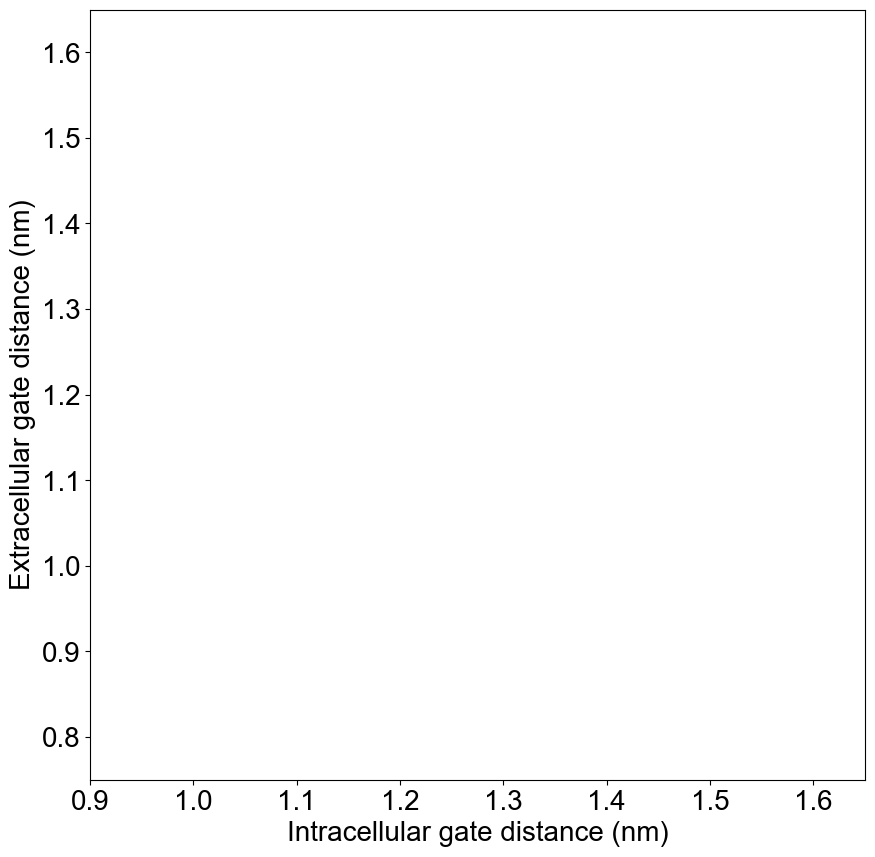

In [27]:
%matplotlib inline 
plot_parameters_for_paper.plotting_params()
f, ax = plt.subplots(1,1,figsize=(10,10))


ax.set_xlabel(cv_labels[0])
ax.set_ylabel(cv_labels[1])

ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()
#plt.savefig('../images_figs/histograms_on_FES/method_grids_outline.png', dpi = 1000)

# Plotting error - as calculated from `string_MSM_analysis_TICs`

In [104]:
errors = np.load(f'../../string_sims/TMD_initial_path/{name_sim}/postprocessing/errors.npy')

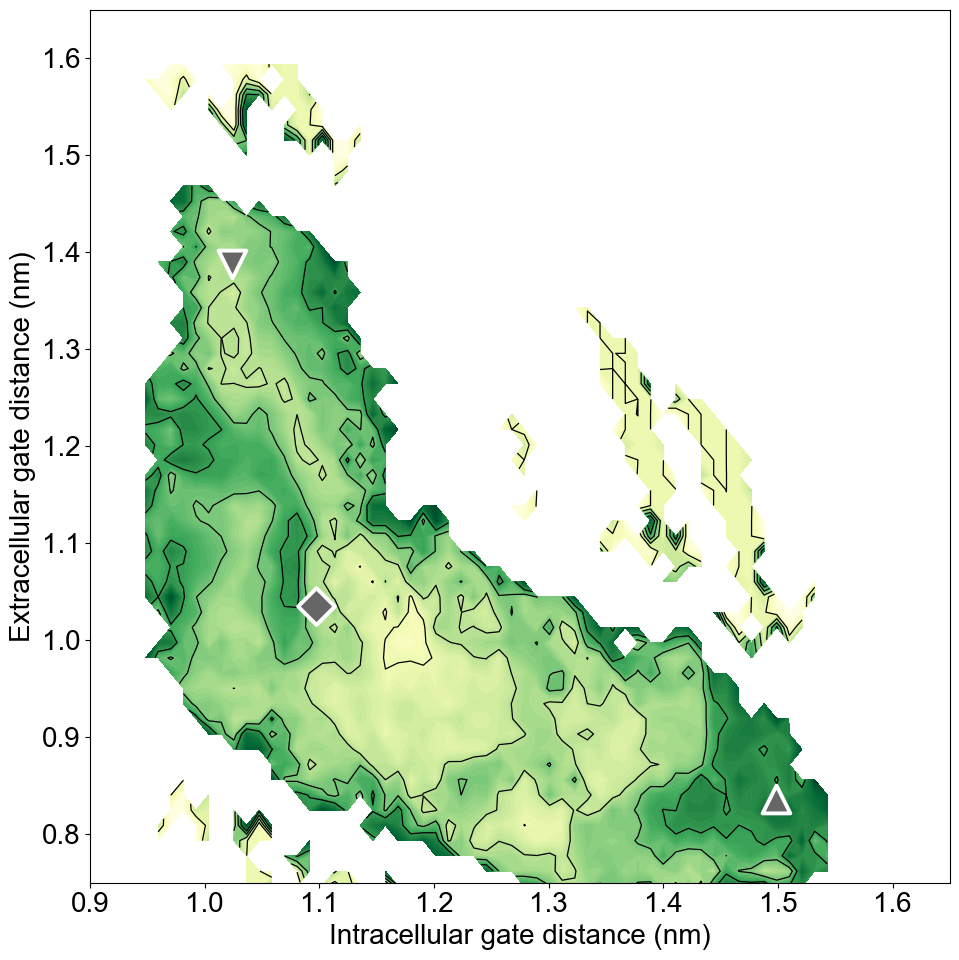

In [105]:
blocks =[2, 4, 8, 16, 32]
number_blocks = 4
f_max = 20
e_max = 3
e_min = 1.0e-03

e = errors[blocks.index(number_blocks)].copy()
e[e > e_max] = np.nan
e[e <= e_min] = np.nan


plot_parameters_for_paper.plotting_params()


cm = plt.cm.get_cmap('YlGn')


if 'apo' in name_sim:
    colorbar=False
    ylabel=cv_labels[1]
elif 'BFRU' in name_sim:
    colorbar=False
    ylabel=cv_labels[1]#None
    
with plt.rc_context({"axes.grid": False}):

    fig, ax = my_msm.plot_2D_heatmap(
        e,
        extent,
        cmap=cm,
        f_max=e_max,
        f_min=e_min,
        cbar_label="Free Energy (kT)",
        xlabel=cv_labels[0],
        ylabel=ylabel,
        xlim= xlim,
        ylim= ylim,
        colorbar=colorbar
    )

    fig.tight_layout()
    fig.patch.set_facecolor('white')

    plt.rcParams["axes.grid"] = False

    #ax.contour(F, vmin=0, vmax=f_max, extent=extent, colors = 'black', \
     #          levels = [0,1,2,3,4,5,6,7], linewidths=0.9)
    ax.contour(e, vmin=0, vmax=e_max, extent=extent, colors='black',\
               levels=[0,0.5,1,1.5,2], linewidths=0.9)

    markers = ['v','D','^']
    sizes = [400, 350, 400]
    if plot_atomistic:
        for n, sim in enumerate(atom_sims):
            ic = float(sim[-1].split(' ')[1])
            ec = float(sim[-2].split(' ')[1])
            ax.scatter(ic, ec, color = ['#666666'], edgecolor = 'white', \
                       s = sizes[n], zorder=2, marker = markers[n], linewidth = 2.8)



#ax.set_title("Bootstrap Error (95%)")
fig.tight_layout()

fig.savefig(path_report + "FES_error.png")

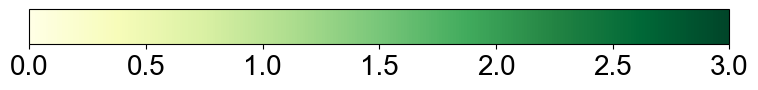

In [91]:
vmin = 0
vmax = e_max
plot_parameters_for_paper.plotting_params()

a = np.array([[vmin, vmax]])
plt.figure(figsize=(1, 7))
img = plt.imshow(a, cmap="YlGn")
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.1, 7, 0.05]) #size of colorbar. [?, ?, length, thickness]
plt.colorbar(orientation='horizontal', cax=cax,)


plt.savefig('../images_figs/MSM_FES/IC_EC_MSM/colorbar_for_error_max_3.svg',bbox_inches='tight')

In [96]:
path_report

'/data2/GLUT5_string/string/analysis/images_figs/MSM_FES/IC_EC_MSM/influx_apo_gate_CV'